In [1]:
library(ggplot2)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# SKip the first 7 rows and get the header in the 8th row
# The first 7 rows are not needed, and the 8th row contains the header
ps_df_af <- read_csv("../../docs/report/data/sota-AF_publications_per_year_2.csv", skip = 7, col_names = TRUE)
cols <- c("year", "publications")
colnames(ps_df_af) <- cols
head(ps_df_af, 10)

New names:
• `` -> `...2`
Rows: 38 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): YEAR, ...2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,publications
<dbl>,<dbl>
2025,46
2024,129
2023,76
2022,85
2021,103
2020,78
2019,113
2018,105
2017,87


In [3]:
ps_df_af_ai <- read_csv("../../docs/report/data/sota-AF_AI_publications_per_year_2.csv", skip = 7, col_names = TRUE)
cols <- c("year", "publications")
colnames(ps_df_af_ai) <- cols
head(ps_df_af_ai, 10)

New names:
• `` -> `...2`
Rows: 12 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): YEAR, ...2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,publications
<dbl>,<dbl>
2025,9
2024,30
2023,9
2022,8
2021,9
2020,4
2019,2
2018,1
2016,1


In [4]:
ps_df_af_ai_3d <- read_csv("../../docs/report/data/sota-AF_AI_3D_publications_per_year.csv", skip = 7, col_names = TRUE)
cols <- c("year", "publications")
colnames(ps_df_af_ai_3d) <- cols
head(ps_df_af_ai_3d, 10)

New names:
• `` -> `...2`
Rows: 5 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): YEAR, ...2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,publications
<dbl>,<dbl>
2024,3
2023,1
2022,2
2021,1
2012,1


In [5]:
joined <- full_join(ps_df_af, ps_df_af_ai, by = "year", suffix = c("_df1", "_df2"))
joined[is.na(joined)] <- 0

joined <- full_join(joined, ps_df_af_ai_3d, by = "year", suffix = c("_df1", "_df3"))
joined[is.na(joined)] <- 0


cols <- c("year", "AF", "AF+AI", "AF+AI+3D")
colnames(joined) <- cols
joined

year,AF,AF+AI,AF+AI+3D
<dbl>,<dbl>,<dbl>,<dbl>
2025,46,9,0
2024,129,30,3
2023,76,9,1
2022,85,8,2
2021,103,9,1
2020,78,4,0
2019,113,2,0
2018,105,1,0
2017,87,0,0


In [6]:
df_long <- pivot_longer(joined, 
                        cols = c("AF", "AF+AI", "AF+AI+3D"),
                        names_to = "topic", 
                        values_to = "publications")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


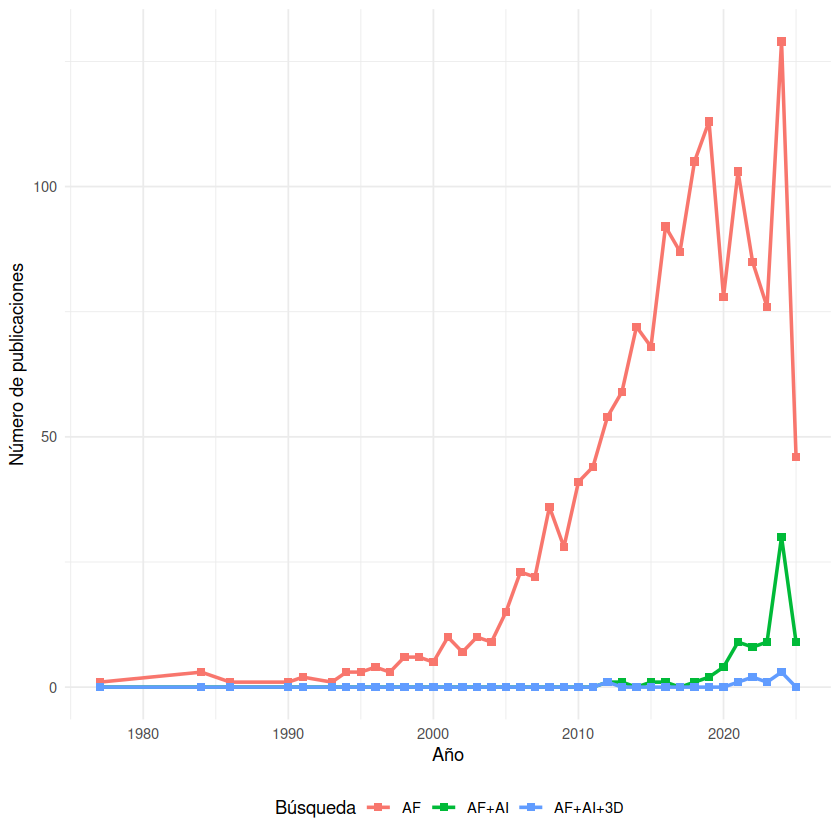

In [7]:
ggplot(df_long, aes(x = year, y = publications, color = topic)) +
  geom_line(size = 1) +
  geom_point(size = 2, shape = 15) +
  labs(x = "Año", 
       y = "Número de publicaciones",
       color = "Búsqueda") +
  theme_minimal() +
  theme(legend.position = "bottom")

save_path <- str_c("../../docs/report/figures/3_sota/scopus_pubs.pdf")
ggsave(save_path, width = 6, height = 4.5, dpi = 100)
